### 1. Import packages

In [1]:
from analysis_tools.common import *

%load_ext autoreload
%autoreload 2

# 2. Load dataset

In [2]:
train_data_meta = pd.read_csv(join(PATH.input, 'train_df.csv'), index_col=0)
test_data_meta  = pd.read_csv(join(PATH.input, 'test_df.csv'), index_col=0)

display(train_data_meta.head(), test_data_meta.head())

file_name       class state            label
index                                              
0      10000.png  transistor  good  transistor-good
1      10001.png     capsule  good     capsule-good
2      10002.png  transistor  good  transistor-good
3      10003.png        wood  good        wood-good
4      10004.png      bottle  good      bottle-good

file_name
index           
0      20000.png
1      20001.png
2      20002.png
3      20003.png
4      20004.png

In [5]:
print("- Unique states for each class")
for c in train_data_meta['class'].unique():
    print(f"-> {c}: \t", train_data_meta[train_data_meta['class'] == c]['state'].value_counts().to_dict())

- Unique states for each class
-> transistor: 	 {'good': 213, 'bent_lead': 5, 'damaged_case': 5, 'misplaced': 5, 'cut_lead': 5}
-> capsule: 	 {'good': 219, 'crack': 12, 'scratch': 12, 'poke': 11, 'faulty_imprint': 11, 'squeeze': 10}
-> wood: 	 {'good': 247, 'scratch': 11, 'combined': 6, 'hole': 5, 'liquid': 5, 'color': 4}
-> bottle: 	 {'good': 209, 'contamination': 11, 'broken_small': 11, 'broken_large': 10}
-> screw: 	 {'good': 320, 'scratch_neck': 13, 'thread_side': 12, 'manipulated_front': 12, 'thread_top': 12, 'scratch_head': 12}
-> cable: 	 {'good': 224, 'bent_wire': 7, 'cut_inner_insulation': 7, 'missing_cable': 6, 'combined': 6, 'cable_swap': 6, 'cut_outer_insulation': 5, 'missing_wire': 5, 'poke_insulation': 5}
-> carpet: 	 {'good': 280, 'thread': 10, 'color': 10, 'hole': 9, 'metal_contamination': 9, 'cut': 9}
-> hazelnut: 	 {'good': 391, 'crack': 9, 'cut': 9, 'hole': 9, 'print': 9}
-> pill: 	 {'good': 267, 'crack': 13, 'color': 13, 'scratch': 12, 'contamination': 11, 'faulty_i

In [6]:
train_img_paths = ls_file(PATH.train)
test_img_paths  = ls_file(PATH.test)

n_trains = len(train_img_paths)
n_tests  = len(test_img_paths)

print("- number of training data:", n_trains)
print("- number of test data:", n_tests)

- number of training data: 4277
- number of test data: 2154


In [7]:
train_data_meta

file_name       class state            label
index                                              
0      10000.png  transistor  good  transistor-good
1      10001.png     capsule  good     capsule-good
2      10002.png  transistor  good  transistor-good
3      10003.png        wood  good        wood-good
4      10004.png      bottle  good      bottle-good
...          ...         ...   ...              ...
4272   14272.png  transistor  good  transistor-good
4273   14273.png  transistor  good  transistor-good
4274   14274.png        grid  good        grid-good
4275   14275.png      zipper  good      zipper-good
4276   14276.png       screw  good       screw-good

[4277 rows x 4 columns]

In [35]:
from collections import defaultdict

@delayed
def load_img(path):
    return cv2.resize(cv2.imread(path), [512, 512])

with ProgressBar():
    X_train = np.array(compute(*[load_img(path) for path in ls_file(PATH.train)]))

X_dic = defaultdict(dict)
for c in tqdm(train_data_meta['class'].unique()):
    class_selected = train_data_meta.query(f"`class` == '{c}'")
    for s in class_selected['state'].unique():
        idxs = class_selected.query(f"state == '{s}'").index
        X_dic[c][s] = X_train[idxs]

[########################################] | 100% Completed |  9.6s


100%|██████████| 15/15 [00:02<00:00,  5.53it/s]


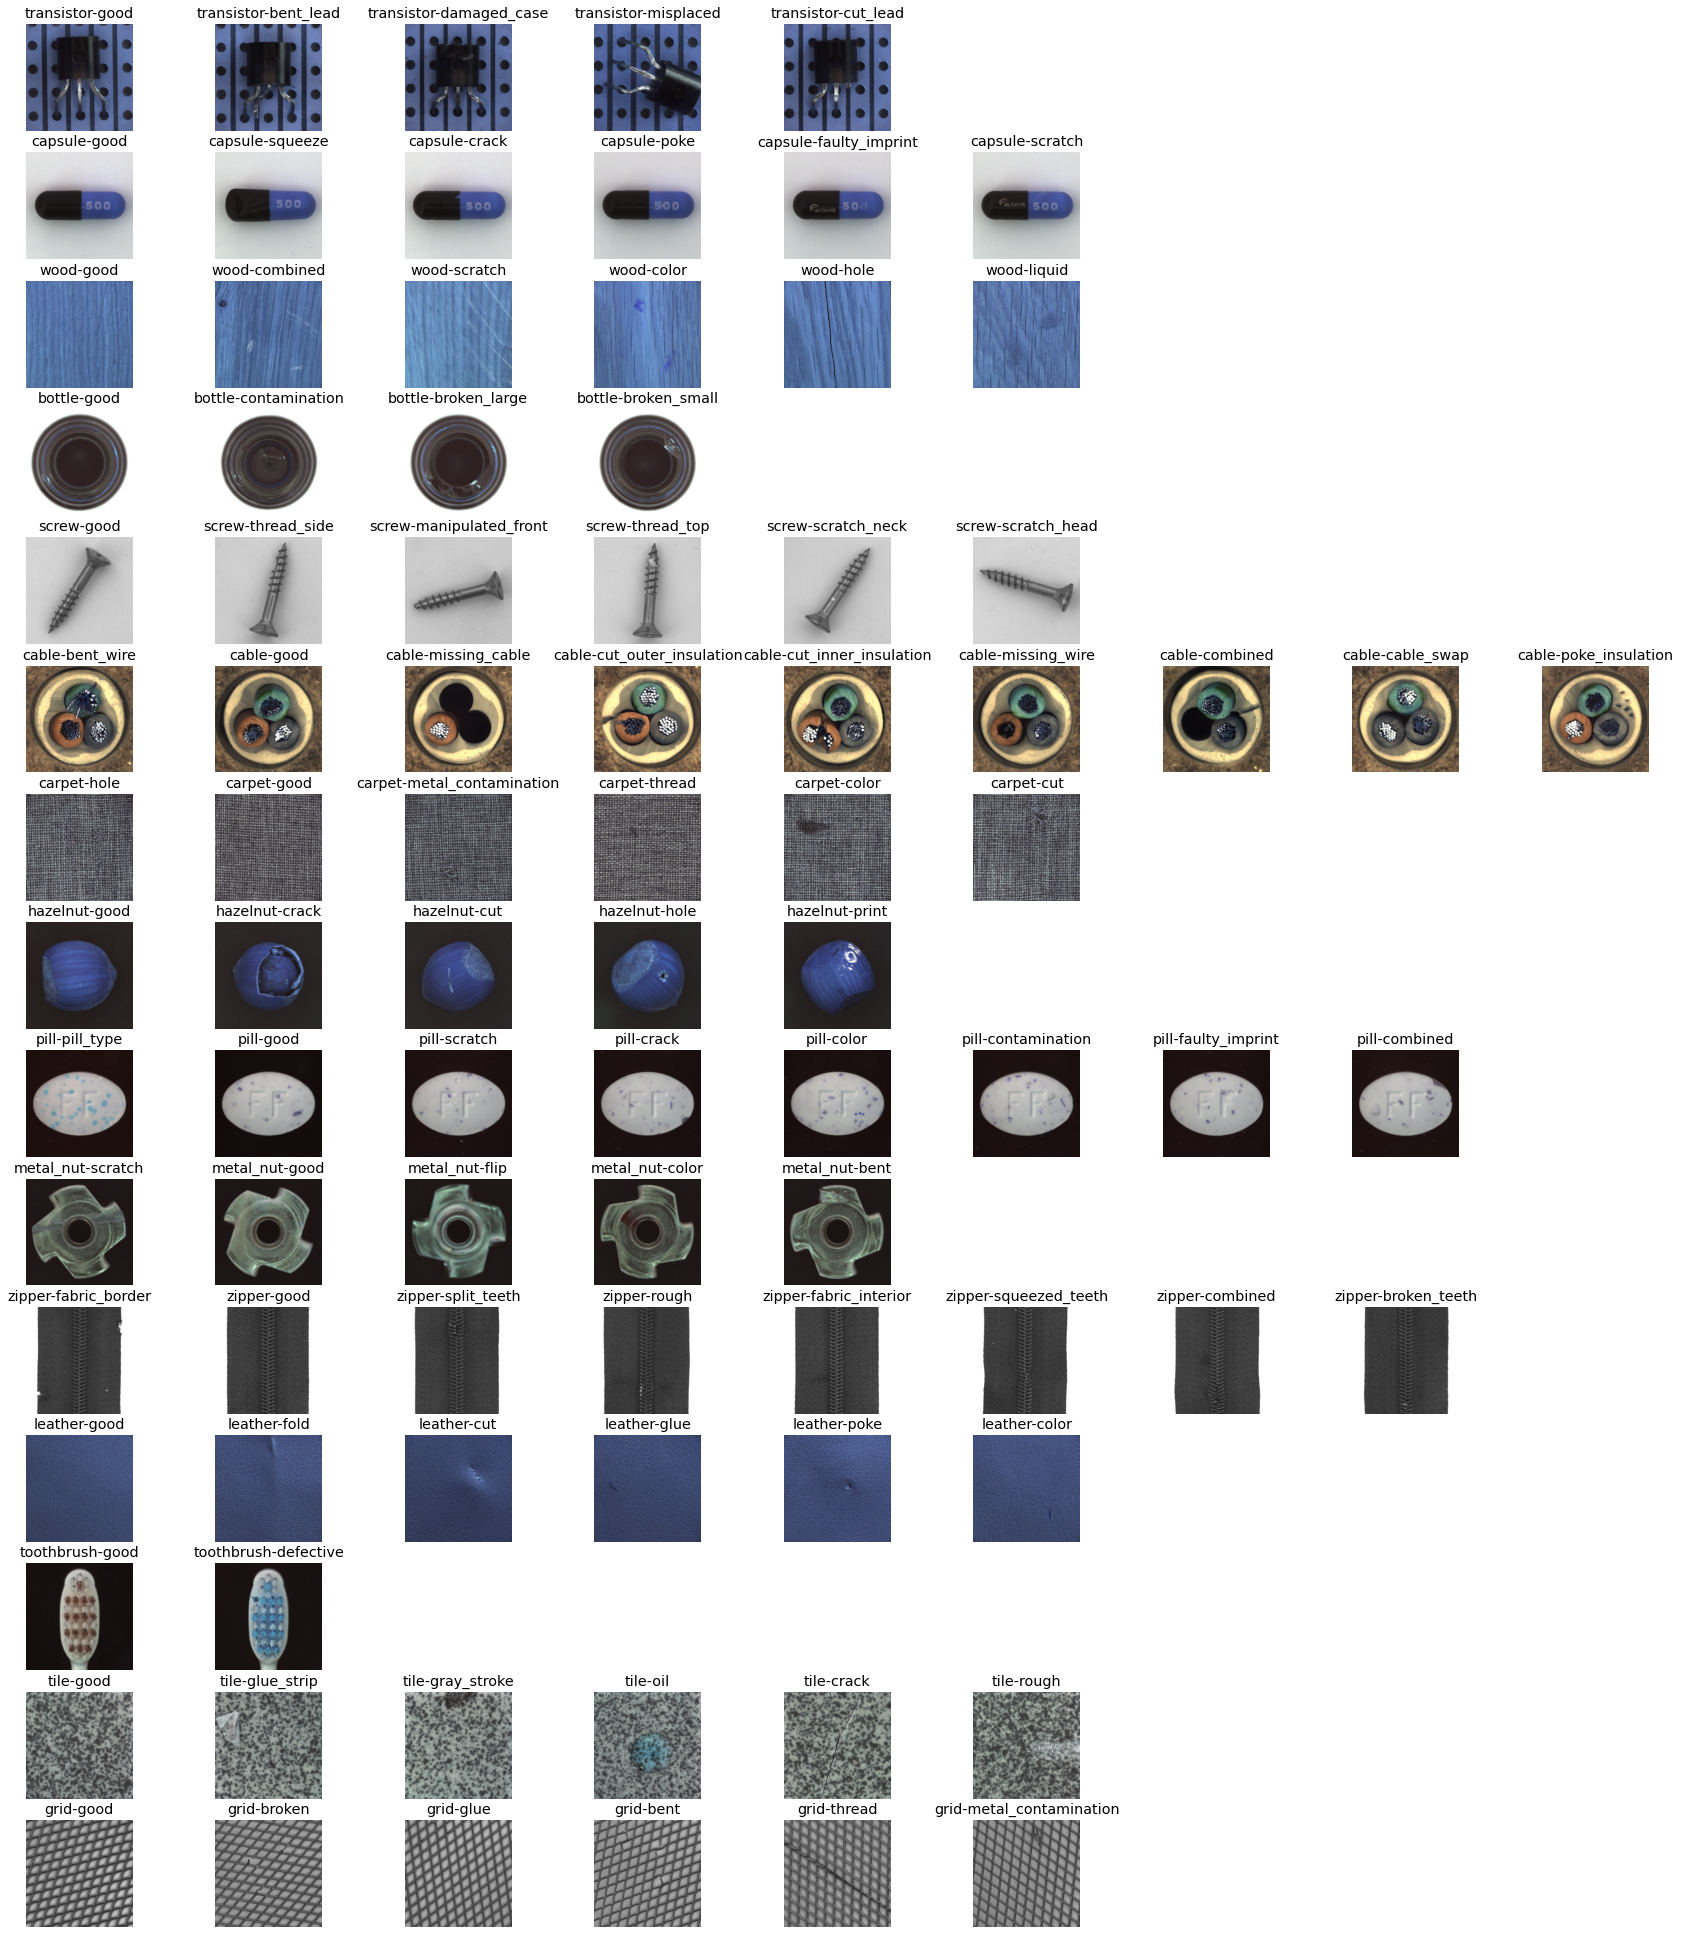

In [42]:
nrows, ncols = 15, 9
fig, axes = plt.subplots(nrows, ncols, figsize=(30, 35))
for idx_row, c in zip(range(nrows), X_dic):
    for idx_col, s in zip(range(ncols), X_dic[c]): 
        axes[idx_row, idx_col].imshow(X_dic[c][s][0])
        axes[idx_row, idx_col].set_title(f"{c}-{s}")

for ax in axes.flatten():
    ax.axis('off')
plt.show()

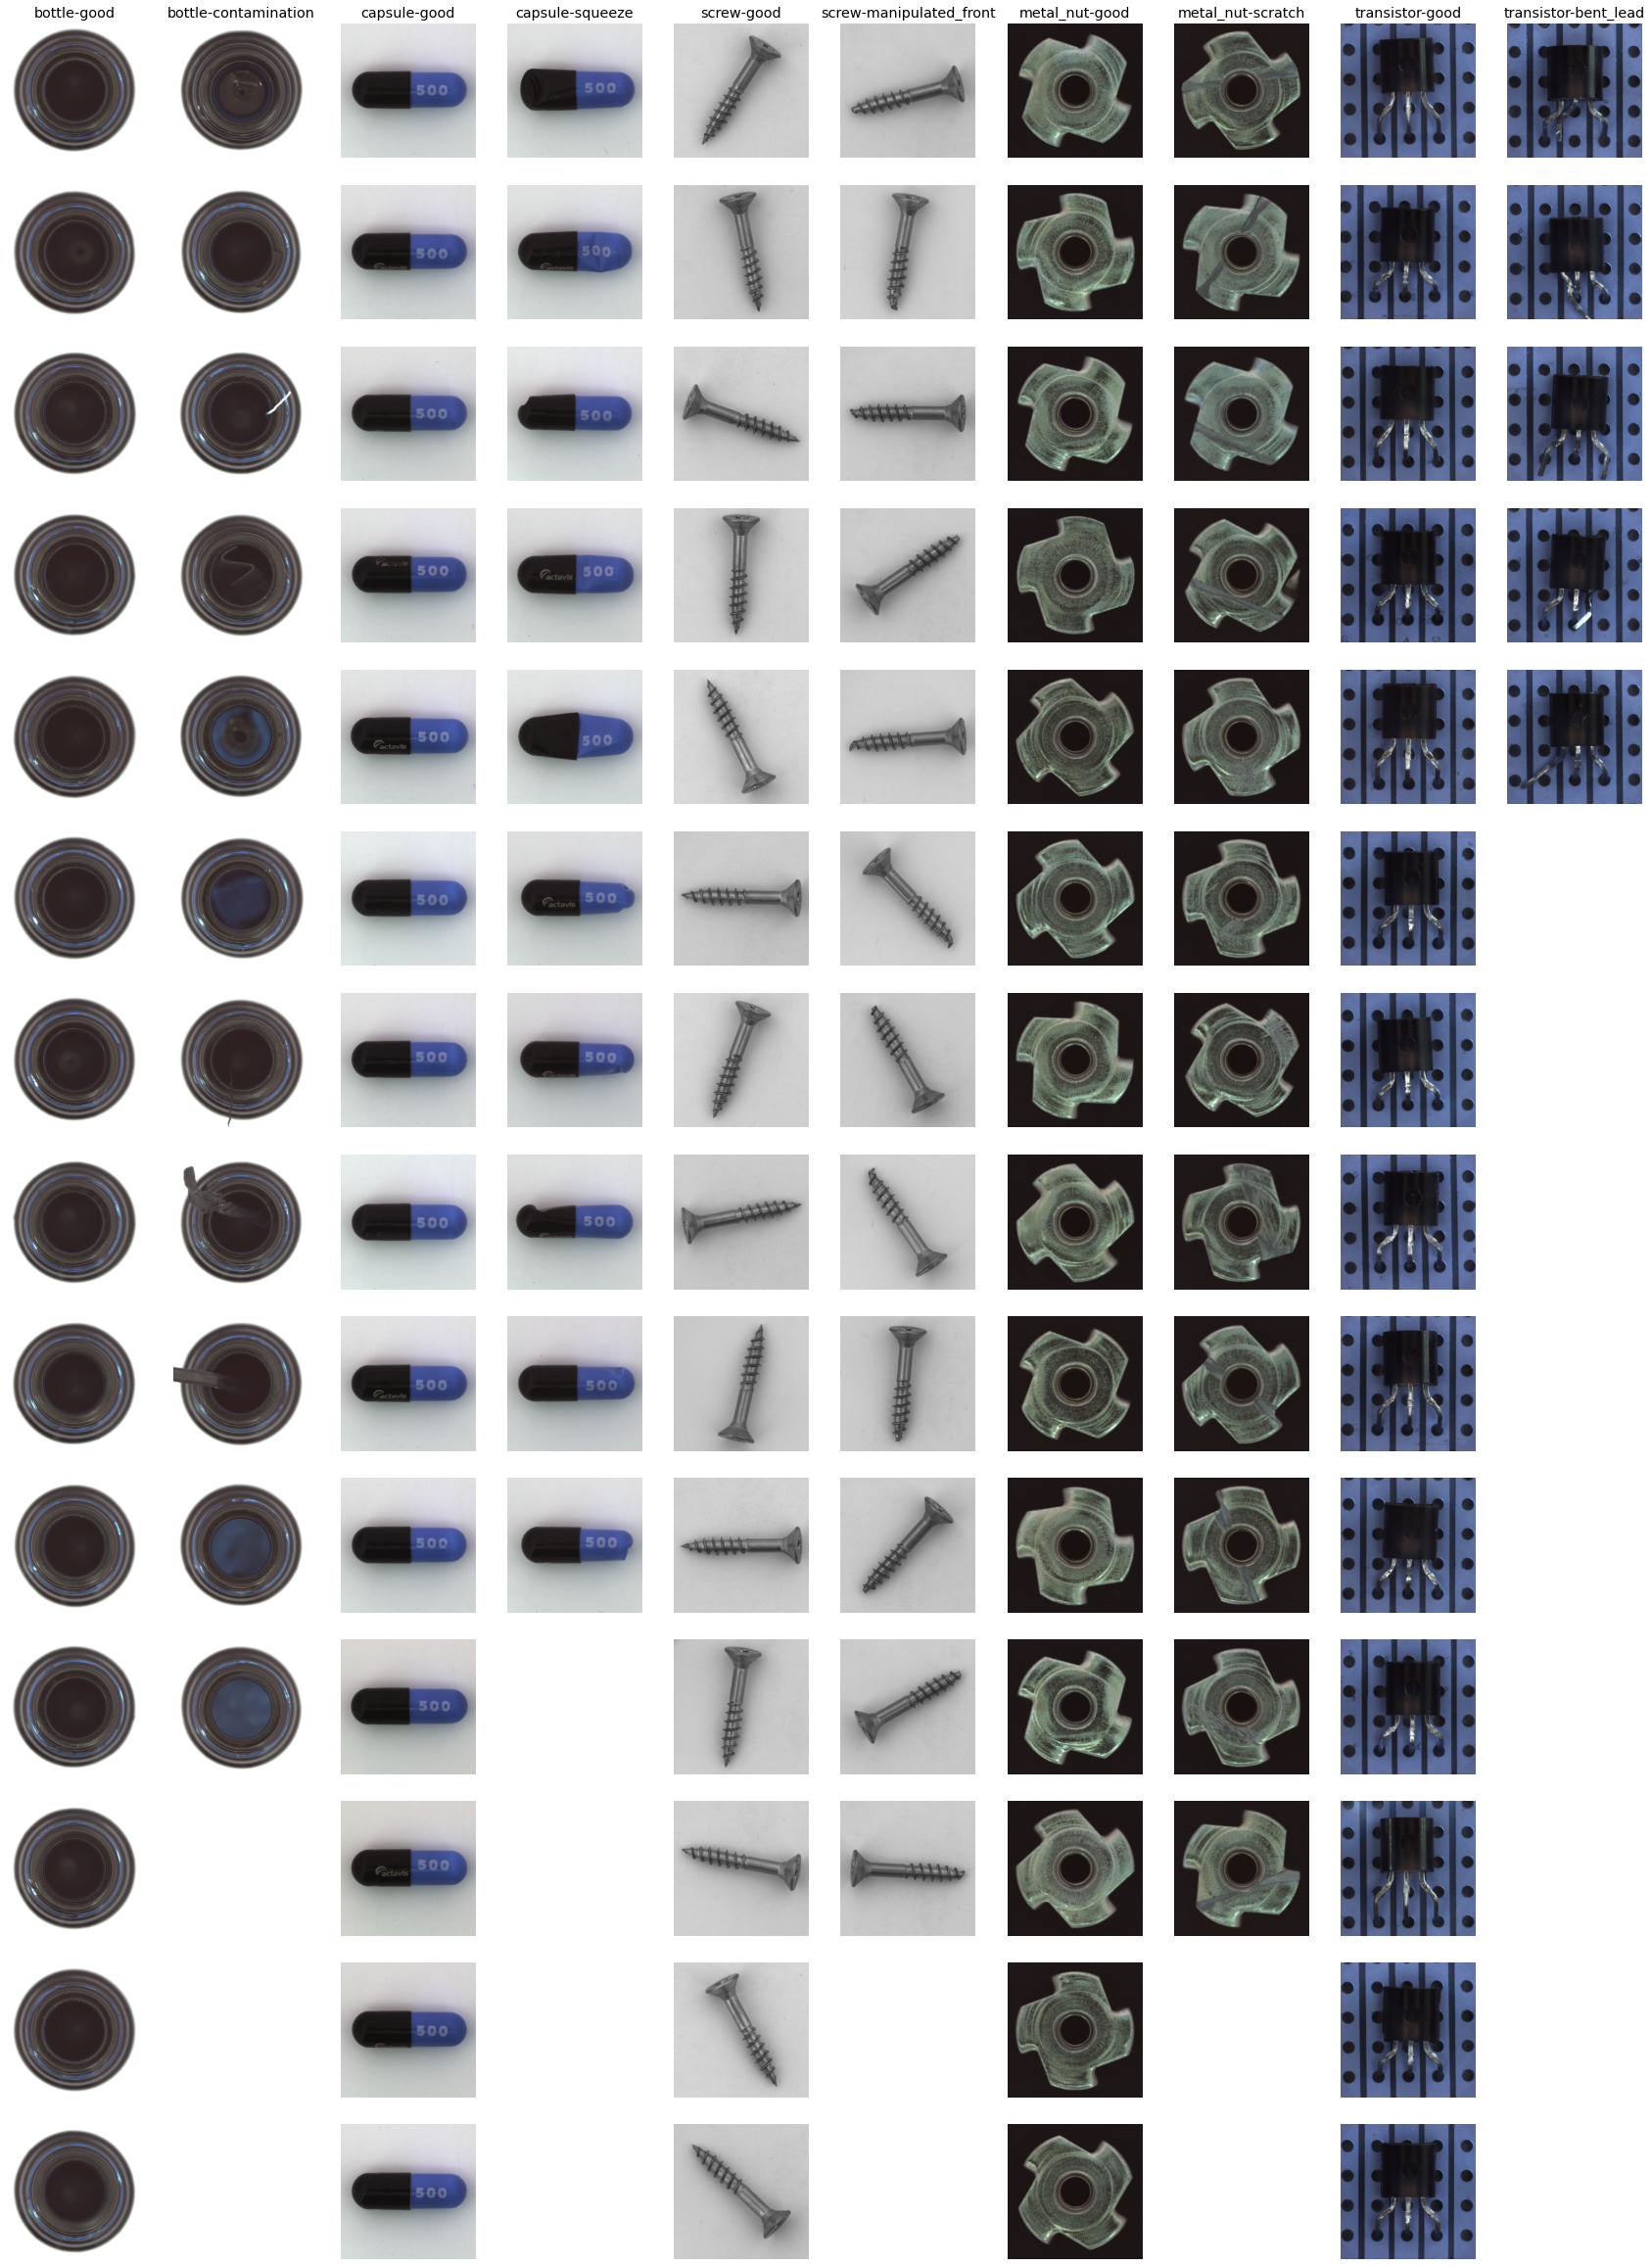

In [94]:
targets = ['bottle-good', 'bottle-contamination', 'capsule-good', 'capsule-squeeze', 'screw-good', 'screw-manipulated_front', 'metal_nut-good', 'metal_nut-scratch', 'transistor-good', 'transistor-bent_lead']

nrows, ncols = 14, 10
fig, axes = plt.subplots(nrows, ncols, figsize=(30, 42))
for col, (c, s) in zip(range(ncols), [target.split('-') for target in targets]):
    X = X_dic[c][s]
    axes[0][col].set_title(f"{c}-{s}")
    for row, sample in zip(range(nrows), X):
        axes[row][col].imshow(sample)
        
for ax in axes.flatten():
    ax.axis('off')
plt.show()